In [121]:
# Import dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# Load in csv
Lockdown_df = pd.read_csv("Resources/Countries_Lock_Down_Dates.csv")
Lockdown_df.head()

,Country,Date of Restrictions,Level,Week of Restrictions,Continent
0,Argentina,3/21/20,National,12,South America
1,Australia,3/23/20,National,13,Australia
2,Bolivia,3/22/20,National,13,South America
3,Brazil,3/17/20,State,12,South America
4,Canada,3/25/20,National,13,North America


In [123]:
# Load in AQI csv
AQI_df = pd.read_csv("Resources/AQI_data.csv")
AQI_df.head()

,country,week,NO2,PM2.5
0,Argentina,1,9.850000,79.013889
1,Argentina,2,8.432540,65.119048
2,Argentina,3,6.671429,27.416667
3,Argentina,4,6.500000,23.750000
4,Argentina,5,5.178571,26.083333


In [124]:
# Combine the dataframes on the country column
combined_df = pd.merge(AQI_df,Lockdown_df,left_on="country",right_on="Country")

In [125]:
# Print the header of the combined dataframe
combined_df.head()

,country,week,NO2,PM2.5,Country,Date of Restrictions,Level,Week of Restrictions,Continent
0,Argentina,1,9.850000,79.013889,Argentina,3/21/20,National,12,South America
1,Argentina,2,8.432540,65.119048,Argentina,3/21/20,National,12,South America
2,Argentina,3,6.671429,27.416667,Argentina,3/21/20,National,12,South America
3,Argentina,4,6.500000,23.750000,Argentina,3/21/20,National,12,South America
4,Argentina,5,5.178571,26.083333,Argentina,3/21/20,National,12,South America


In [204]:
cleaned_df = combined_df.drop(['country', 'Country'], axis = 1) 
cleaned_df 

,week,NO2,PM2.5,Date of Restrictions,Level,Week of Restrictions,Continent
0,1,9.850000,79.013889,3/21/20,National,12,South America
1,2,8.432540,65.119048,3/21/20,National,12,South America
2,3,6.671429,27.416667,3/21/20,National,12,South America
3,4,6.500000,23.750000,3/21/20,National,12,South America
4,5,5.178571,26.083333,3/21/20,National,12,South America
...,...,...,...,...,...,...,...
567,9,13.809524,92.158730,3/31/20,National,14,Asia
568,10,12.873016,76.495238,3/31/20,National,14,Asia
569,11,12.873016,88.182540,3/31/20,National,14,Asia
570,12,9.492063,81.875661,3/31/20,National,14,Asia


In [241]:
cleaned_df2 = cleaned_df.drop(cleaned_df.loc[:, 'Level':'Week of Restrictions':].columns, axis = 1) 

In [244]:
grouped_df = cleaned_df2.groupby(["Continent"]).mean()
grouped_df

,week,NO2,PM2.5
Continent,,,
Africa,7,6.915110,51.079884
Asia,7,20.643366,86.265890
Australia,7,5.634640,29.399371
Europe,7,12.300260,49.548817
North America,7,15.801104,43.516782
South America,7,10.672446,56.926491


<IPython.core.display.Javascript object>


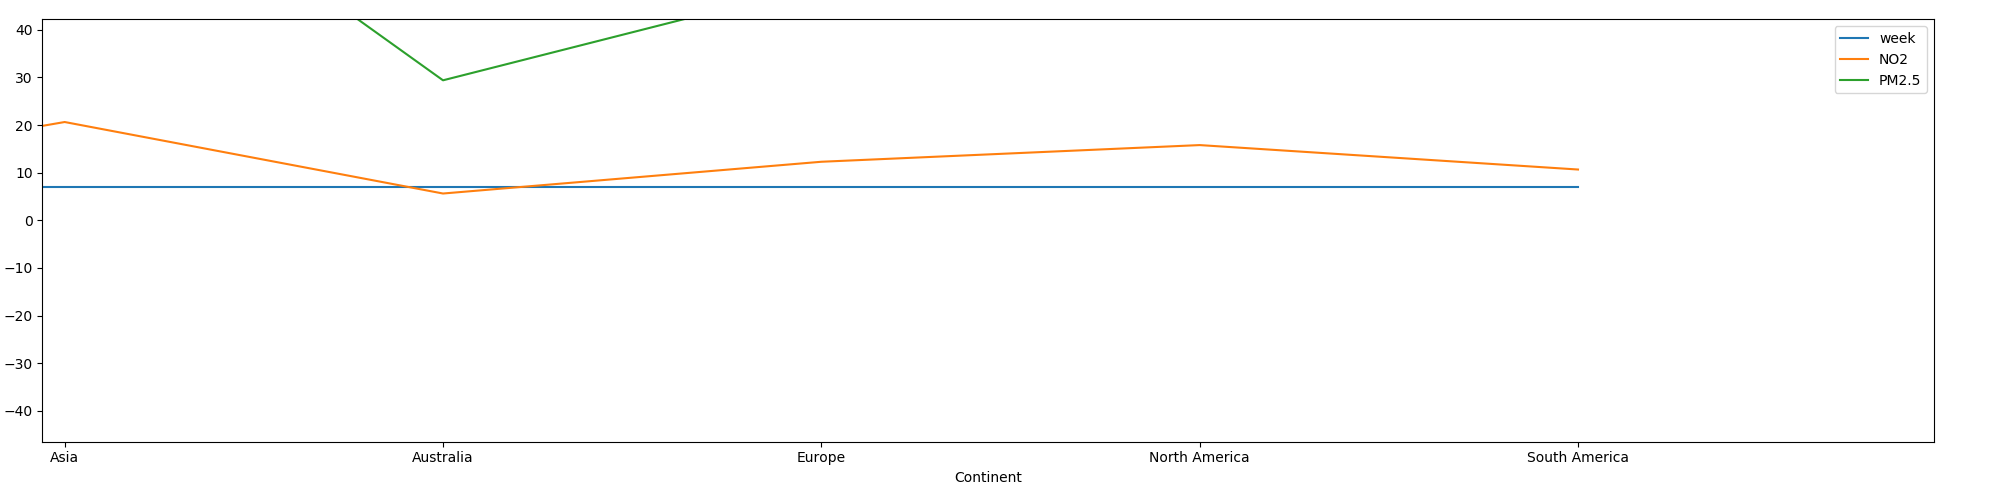

In [238]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = grouped_df.plot(kind="line", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_plot.set_xticklabels(grouped_df["Continent"], rotation=45)

plt.show()
plt.tight_layout()
